# Multi Layer Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Classification Model - Adult Dataset

Loading and understanding the data.

In [2]:
df = pd.read_csv('./final_income_classification.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,90,0,77053,9,-3,0,0,4356,40,0,...,0,0,0,1,0,0,0,1,0,0
1,82,6,132870,9,-3,0,0,4356,18,0,...,0,0,0,1,0,0,1,0,0,0
2,66,0,186061,10,-3,0,0,4356,40,0,...,0,1,0,0,0,0,0,1,0,0
3,54,6,140359,4,-2,0,0,3900,40,0,...,0,0,0,1,0,0,0,1,0,0
4,41,6,264663,10,-1,0,0,3900,40,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,5.178803,1.897784e+05,10.080679,0.538958,0.669205,1077.648844,87.303830,40.437456,0.240810,...,0.031909,0.095943,0.008323,0.854274,0.115783,0.125887,0.124873,0.394214,0.127146,0.112097
std,13.640433,1.729629,1.055500e+05,2.572720,1.555730,0.470506,7385.292085,402.960219,12.347429,0.427581,...,0.175761,0.294518,0.090851,0.352837,0.319969,0.331727,0.330580,0.488689,0.333142,0.315491
min,17.000000,0.000000,1.228500e+04,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,5.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,6.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,2.370510e+05,12.000000,2.000000,1.000000,0.000000,0.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,3.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         32561 non-null  int64
 1   workclass                   32561 non-null  int64
 2   fnlwgt                      32561 non-null  int64
 3   education.num               32561 non-null  int64
 4   marital.status              32561 non-null  int64
 5   sex                         32561 non-null  int64
 6   capital.gain                32561 non-null  int64
 7   capital.loss                32561 non-null  int64
 8   hours.per.week              32561 non-null  int64
 9   income                      32561 non-null  int64
 10  Race_Amer-Indian-Eskimo     32561 non-null  int64
 11  Race_Asian-Pac-Islander     32561 non-null  int64
 12  Race_Black                  32561 non-null  int64
 13  Race_Other                  32561 non-null  int64
 14  Race_W

In [6]:
# Target variable
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='income', ylabel='count'>

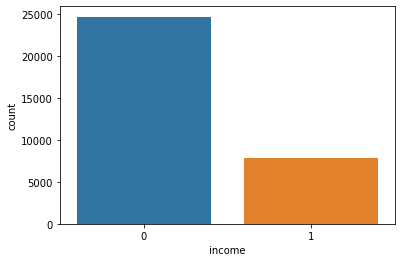

In [7]:
sns.countplot(x='income', data=df)

<AxesSubplot:>

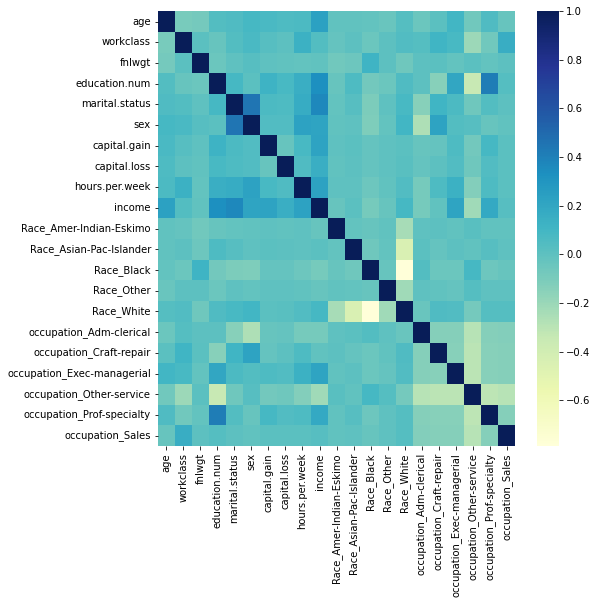

In [8]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="YlGnBu")

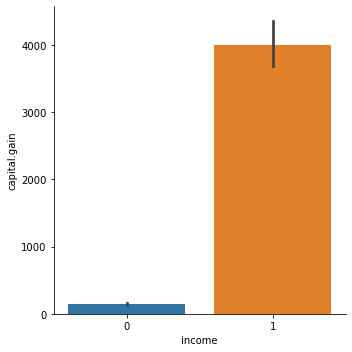

In [9]:
sns.catplot(x='income', y='capital.gain',kind="bar", data=df)

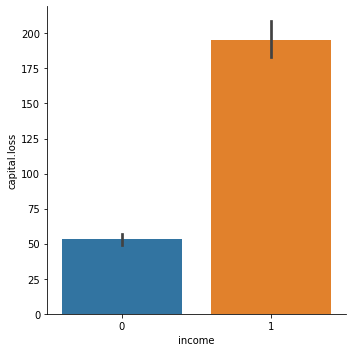

In [10]:
sns.catplot(x='income', y='capital.loss',kind="bar", data=df)

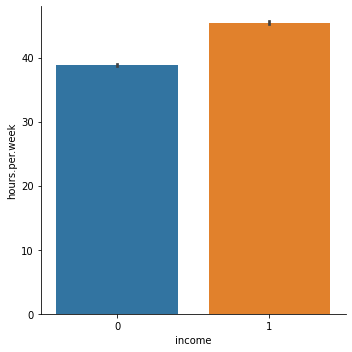

In [11]:
sns.catplot(x='income', y='hours.per.week',kind="bar", data=df)

## Data Scaling and Splitting 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('income', axis=1)
y = df['income']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
standard_scalar = StandardScaler()

In [9]:
standard_scalar.fit(X_train)

StandardScaler()

In [10]:
X_scaled_train = standard_scalar.transform(X_train)
X_scaled_test = standard_scalar.transform(X_test)

In [11]:
X_scaled_train

array([[ 1.42910881,  0.47563644,  0.96194408, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [ 1.72352858,  0.47563644, -0.76197267, ..., -0.80225578,
        -0.38257489,  2.81869738],
       [-0.41101475,  0.47563644, -0.49914857, ...,  1.24648525,
        -0.38257489, -0.35477381],
       ...,
       [ 1.20829398, -0.68286805,  0.46275431, ...,  1.24648525,
        -0.38257489, -0.35477381],
       [ 0.17782479,  0.47563644, -0.33752484, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [-1.22066912,  0.47563644, -0.25579011, ...,  1.24648525,
        -0.38257489, -0.35477381]])

## Modeling and Tuning

In [12]:
from sklearn.neural_network import MLPClassifier

In [36]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_precision_recall_curve, plot_roc_curve

Basic model -  
Training a default model before hyperparameter tuning to see the difference and improvement.

In [15]:
basic_classifier = MLPClassifier()
basic_classifier.fit(X_scaled_train, y_train)
y_pred = basic_classifier.predict(X_scaled_test)

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print("Basic model accuracy score:", accuracy_score(y_test, y_pred))

Basic model accuracy score: 0.8525949431876344


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.73      0.60      0.66      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



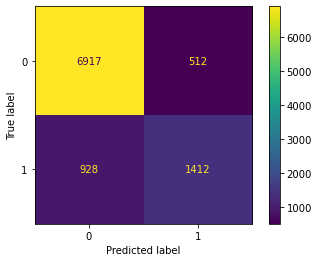

In [18]:
plot_confusion_matrix(basic_classifier, X_scaled_test, y_test)

In [19]:
print("Loss after training:", basic_classifier.loss_)

Loss after training: 0.28076809851038576


In [20]:
print("Number of Coefs:", len(basic_classifier.coefs_)) #Retuns an array where each element represent weights associalted with layer
[weights.shape for weights in basic_classifier.coefs_]

Number of Coefs: 2


[(20, 100), (100, 1)]

In [21]:
print("Number of interations for which estimator ran:", basic_classifier.n_iter_)

Number of interations for which estimator ran: 200


In [22]:
print("Name of output layer Activation function:", basic_classifier.out_activation_)

Name of output layer Activation function: logistic


Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [23]:
params = {
    'activation': ['relu', 'logistic'],
    'hidden_layer_sizes': [(100,), (50, 100,), (50, 75, 100,), ],
    'learning_rate': ['constant', 'adaptive'],
}

In [24]:
grid_model = GridSearchCV(MLPClassifier(random_state=42), param_grid=params, n_jobs=-1, cv=5, verbose=2)
grid_model.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(100,), (50, 100),
                                                (50, 75, 100)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=2)

In [26]:
print('Best Parameters after the search:', grid_model.best_params_)

Best Parameters after the search: {'activation': 'logistic', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant'}


In [27]:
print('Best cross validation score achieved:', grid_model.best_score_)

Best cross validation score achieved: 0.8517023981129477


## Final Model Evaluation

In [28]:
y_grid_pred = grid_model.predict(X_scaled_test)

In [29]:
print("Basic model accuracy score:", accuracy_score(y_test, y_grid_pred))

Basic model accuracy score: 0.8521854846964889


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.73      0.60      0.66      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



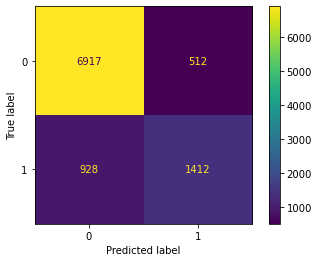

In [31]:
plot_confusion_matrix(basic_classifier, X_scaled_test, y_test)

In [32]:
print("Loss after training:", basic_classifier.loss_)

Loss after training: 0.28076809851038576


In [33]:
print("Number of Coefs:", len(basic_classifier.coefs_)) #Retuns an array where each element represent weights associalted with layer
[weights.shape for weights in basic_classifier.coefs_]

Number of Coefs: 2


[(20, 100), (100, 1)]

In [34]:
print("Name of output layer Activation function:", basic_classifier.out_activation_)

Name of output layer Activation function: logistic


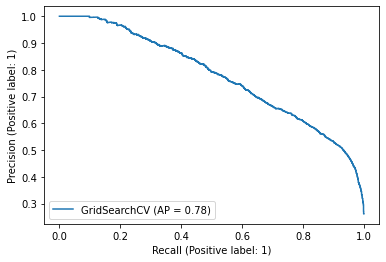

In [38]:
plot_precision_recall_curve(grid_model, X_scaled_test, y_test)

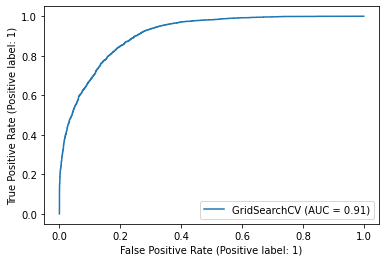

In [40]:
plot_roc_curve(grid_model, X_scaled_test, y_test)

As we can see here that AUC Score is 0.91 which is the highest we have got so far compared to all other model (Naive bayes - 0.87, decision tree - 0.75 and logistic regression - 0.89). Also the accuracy score achieved is 85.21% which is higher than all other models (Logistic regression - 84.41%, Naive bayes - 82.91% and Decision Tree - 81.40%). This is because there are multiple layer present throught which the data passes which helps to find the patterns even better.

## Regression - Insurance Dataset

Since I have done the data preprocessing steps in the previous notebook (Linear regression) I will be importing it directly here.

In [41]:
df_reg = pd.read_csv('./final_insurance.csv')
df_reg.head()

,age,bmi,children,charges,female,male,non-smoker,smoker,region_0,region_1,region_2
0,19,27.900,0,16884.92400,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,1
4,32,28.880,0,3866.85520,0,1,1,0,0,1,1


In [42]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   female      1338 non-null   int64  
 5   male        1338 non-null   int64  
 6   non-smoker  1338 non-null   int64  
 7   smoker      1338 non-null   int64  
 8   region_0    1338 non-null   int64  
 9   region_1    1338 non-null   int64  
 10  region_2    1338 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 115.1 KB


In [43]:
df_reg.describe()

,age,bmi,children,charges,female,male,non-smoker,smoker,region_0,region_1,region_2
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.514948,0.485800
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.499963,0.499985
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_reg.isnull().sum()

age           0
bmi           0
children      0
charges       0
female        0
male          0
non-smoker    0
smoker        0
region_0      0
region_1      0
region_2      0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='bmi', ylabel='charges'>

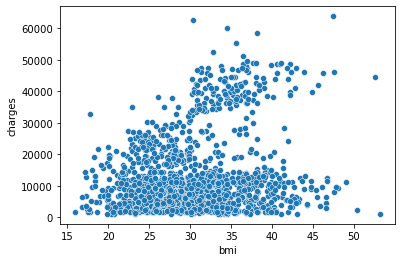

In [46]:
sns.scatterplot(data=df_reg ,y='charges', x='bmi')

<AxesSubplot:>

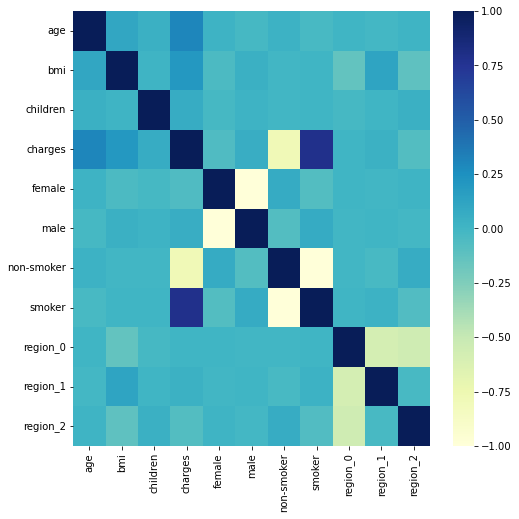

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_reg.corr(), cmap="YlGnBu")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

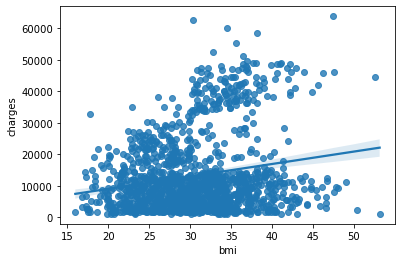

In [50]:
sns.regplot(x='bmi', y='charges', data=df_reg)

<AxesSubplot:xlabel='age', ylabel='charges'>

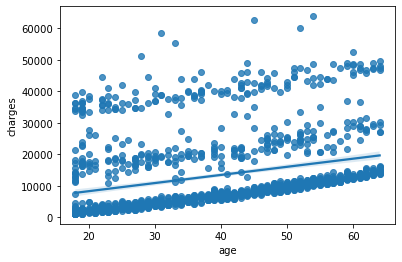

In [51]:
sns.regplot(x='age', y='charges', data=df_reg)

<AxesSubplot:xlabel='age', ylabel='charges'>

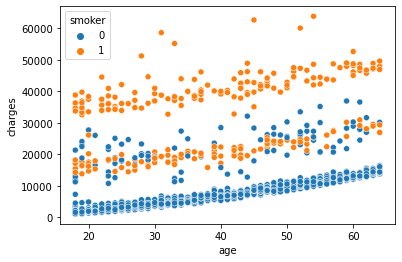

In [54]:
sns.scatterplot(data=df_reg, x='age', y='charges', hue='smoker')

## Scaling and spliting

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [55]:
X = df_reg.drop('charges', axis=1)
y = df_reg['charges']

In [56]:
X

,age,bmi,children,female,male,non-smoker,smoker,region_0,region_1,region_2
0,19,27.900,0,1,0,0,1,0,0,1
1,18,33.770,1,0,1,1,0,0,1,0
2,28,33.000,3,0,1,1,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,1
4,32,28.880,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,1
1334,18,31.920,0,1,0,1,0,1,0,0
1335,18,36.850,0,1,0,1,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modeling and Tuning

In [61]:
from sklearn.neural_network import MLPRegressor

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
basic_model = MLPRegressor(max_iter=10000)
basic_model.fit(X_train, y_train)
y_pred = basic_model.predict(X_test)

In [81]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4206.22427970505
Root Mean Squared Error: 5901.927601433018


In [82]:
charges_mean = y_test.mean()
print("Mean of charges:", charges_mean)

Mean of charges: 13048.923798052047


In [83]:
print("Percentage of error compared to mean:", np.sqrt(mean_squared_error(y_test, y_pred))/charges_mean * 100)

Percentage of error compared to mean: 45.229228806700995


In [84]:
print("R2 score:",r2_score(y_test, y_pred))

R2 score: 0.7623062458617409


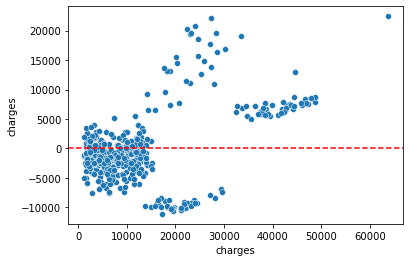

In [85]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

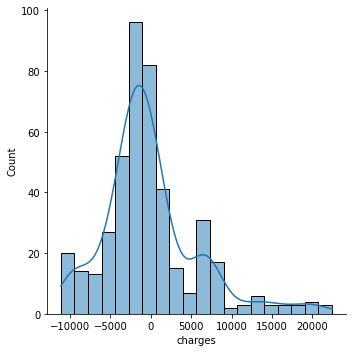

In [86]:
sns.displot(test_residuals, bins=20, kde=True)

Text(0, 0.5, 'charges')

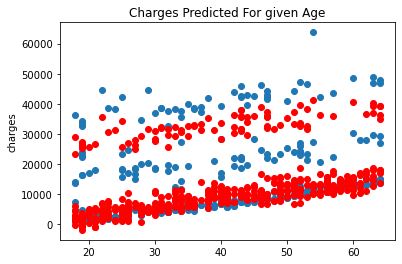

In [87]:
ax = plt.axes()
ax.plot(X_test['age'], y_test, 'o')
ax.plot(X_test['age'], y_pred, 'o', color='red')
ax.set_title('Charges Predicted For given Age')
ax.set_ylabel("charges")

Text(0, 0.5, 'charges')

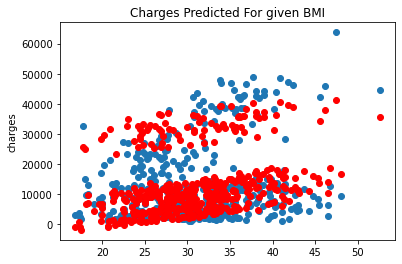

In [88]:
ax = plt.axes()
ax.plot(X_test['bmi'], y_test, 'o')
ax.plot(X_test['bmi'], y_pred, 'o', color='red')
ax.set_title('Charges Predicted For given BMI')
ax.set_ylabel("charges")

## Hyperparameter Tuning 

In [ ]:
MLPRegressor()

In [100]:
params = {
    'activation': ['relu', 'logistic'],
    'hidden_layer_sizes': [(100,), (50, 75, 100,), (50, 100, 100)],
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['lbfgs', 'adam'],
}

In [101]:
grid_model = GridSearchCV(MLPRegressor(random_state=42), param_grid=params, n_jobs=-1, cv=5, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(100,), (50, 75, 100),
                                                (50, 100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'adam']},
             verbose=2)

In [102]:
print('Best Parameters after the search:', grid_model.best_params_)

Best Parameters after the search: {'activation': 'relu', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [103]:
print('Best cross validation score achieved:', grid_model.best_score_)

Best cross validation score achieved: 0.8126800480853376


In [104]:
y_grid_pred = grid_model.predict(X_test)

In [105]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_grid_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_grid_pred)))

Mean Absolute Error: 3093.671766280011
Root Mean Squared Error: 4948.124749278122


In [106]:
charges_mean = y_test.mean()
print("Mean of charges:", charges_mean)

Mean of charges: 13048.923798052047


In [110]:
print("Percentage of error compared to mean:", np.sqrt(mean_squared_error(y_test, y_grid_pred))/charges_mean * 100)

Percentage of error compared to mean: 37.91979189898237


In [111]:
print("R2 score:",r2_score(y_test, y_grid_pred))

R2 score: 0.8329250672288757


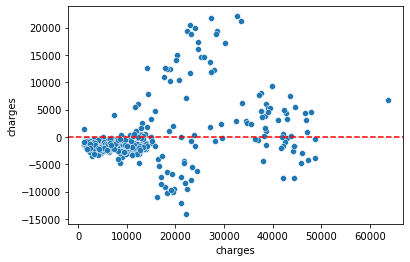

In [112]:
test_residuals = y_test - y_grid_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

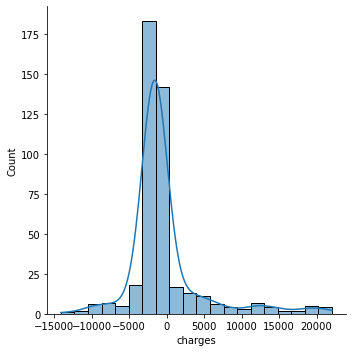

In [113]:
sns.displot(test_residuals, bins=20, kde=True)

Text(0, 0.5, 'charges')

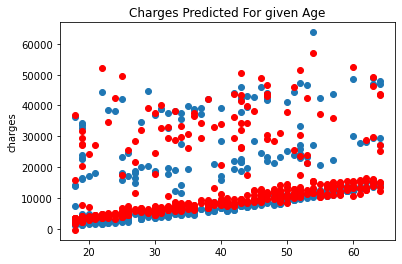

In [114]:
ax = plt.axes()
ax.plot(X_test['age'], y_test, 'o')
ax.plot(X_test['age'], y_grid_pred, 'o', color='red')
ax.set_title('Charges Predicted For given Age')
ax.set_ylabel("charges")

Text(0, 0.5, 'charges')

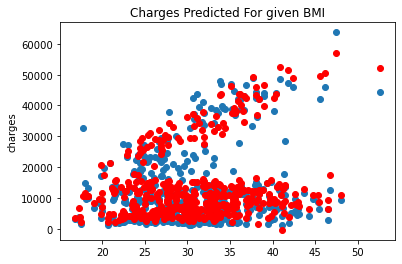

In [115]:
ax = plt.axes()
ax.plot(X_test['bmi'], y_test, 'o')
ax.plot(X_test['bmi'], y_grid_pred, 'o', color='red')
ax.set_title('Charges Predicted For given BMI')
ax.set_ylabel("charges")

As we can se after grid search the results are much better and the model fits better on the given data, as we can see from the last two plots where red denotes the predicted values and blue denotes the actual values. Also on seeing the residual plots we can see that most of the count for the error lie in the 0 range and curve is not skewed on a side which is good and also first plot is scatter comparatively well (than linear regression) which is good. Also the R2 score achieved is 83.29% which is far better than 76% achieved by linear regression. Also the RMSE achieved is 4948 when compared to 5923 by linear regression.

This model performs better than linear regression as the dataset is not that well linearly related and needs a more complex understanding method like that used by MLP to understand the underlying patter or tend.